## Spam Email Classifier with KNN using TF-IDF scores

1.   Assignment must be implemented in Python 3 only.
2.   You are allowed to use libraries for data preprocessing (numpy, pandas, nltk etc) and for evaluation metrics, data visualization (matplotlib etc.).
3.   You will be evaluated not just on the overall performance of the model and also on the experimentation with hyper parameters, data prepossessing techniques etc.
4.   The report file must be a well documented jupyter notebook, explaining the experiments you have performed, evaluation metrics and corresponding code. The code must run and be able to reproduce the accuracies, figures/graphs etc.
5.   For all the questions, you must create a train-validation data split and test the hyperparameter tuning on the validation set. Your jupyter notebook must reflect the same.
6.   Strict plagiarism checking will be done. An F will be awarded for plagiarism.

**Task: Given an email, classify it as spam or ham**

Given input text file ("emails.txt") containing 5572 email messages, with each row having its corresponding label (spam/ham) attached to it.

This task also requires basic pre-processing of text (like removing stopwords, stemming/lemmatizing, replacing email_address with 'email-tag', etc..).

You are required to find the tf-idf scores for the given data and use them to perform KNN using Cosine Similarity.

### Import necessary libraries

In [1]:
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk
import numpy as np
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Unzipping corpora/omw-1.4.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

### Load dataset

In [2]:
file = open("./emails.txt")
tmp = file.readlines()
lemmatizer = WordNetLemmatizer()
#print(tmp[0])

### Preprocess data

In [3]:
dictionary = {'ham': [], 'spam': []}
for i in tmp:
    i = i.split("\t")
    dictionary[i[0]].append(i[1][:-1])
stop_words = set(stopwords.words('english'))
data_all_mails = []
data_classification = ['ham' for i in range(len(dictionary['ham']))]
for i in dictionary['ham']:
    data_all_mails.append(i)
for i in dictionary['spam']:
    data_all_mails.append(i)
    data_classification.append('spam')
x_train, x_test, y_train, y_test = train_test_split(data_all_mails, data_classification, test_size=0.5, random_state=1)

### TF-IDF

In [4]:
#TF
data_train = []
data_test = []
train_tf = []
test_tf = []
All_words = []
for i in range(len(x_train)):
    temp2 = word_tokenize(x_train[i])
    temp = []
    for i in temp2:
        if i not in stop_words:
            temp.append(lemmatizer.lemmatize(i))
    data_train.append(temp)
    temp_tf = set(temp)
    tf = {}
    for j in temp_tf:
        tf[j] = int(temp.count(j))
        tf[j] = tf[j]/len(temp)
        All_words.append(j)
    train_tf.append(tf)
for i in range(len(x_test)):
    temp2 = word_tokenize(x_test[i])
    temp = []
    for i in temp2:
        if i not in stop_words:
            temp.append(lemmatizer.lemmatize(i))
    data_test.append(temp)
    temp_tf = set(temp)
    tf = {}
    for j in temp_tf:
        tf[j] = int(temp.count(j))
        tf[j] = tf[j]/len(temp)
        All_words.append(j)
    test_tf.append(tf)

All_words = list(set(All_words))
#print(ham_tf[0])

#IDF
IDF = {}
for j in All_words:
    tmp_idf = 0
    for i in train_tf:
        if(j in i.keys()):
            tmp_idf+=1
    for i in test_tf:
        if(j in i.keys()):
            tmp_idf+=1
    IDF[j] = len(train_tf)+len(test_tf)
    IDF[j] = math.log2(IDF[j]/tmp_idf)

### F-Score Dictionary for Plotting

In [5]:
Fscore = {'Euclidean': [0 for i in range(30)], 'Manhattan': [0 for i in range(30)], 'Cosine': [0 for i in range(30)]}

### F Score Function

In [6]:
def fscore_cal(k, distance,f):
  temp = []
  total = len(x_test)
  for i in range(len(x_test)):
    tmp = []
    for j in range(len(x_train)):
      tmp.append((distance[i][j], j))
    tmp.sort(reverse=f)
    h = 0
    s = 0
    for j in range(k):
      if y_train[tmp[j][1]][0] == 'h':
        h+=1
      else:
        s+=1
    if (h > s):
      if('h' == y_test[i][0]):
        temp.append('fn')
      else:
        temp.append('tn')
    elif s > h:
      if('s' == y_test[i][0]):
        temp.append('tp')
      else:
        temp.append('fp')
    else:
      if(y_train[tmp[0][1]][0] == 'h'):
        if('h' == y_test[i][0]):
          temp.append('fn')
        else:
          temp.append('tn')
      else:
        if('s' == y_test[i][0]):
          temp.append('tp')
        else:
          temp.append('fp')
  return temp

### Train your KNN model (reuse previously iplemented model built from scratch) and test on your data

***1. Experiment with different distance measures [Euclidean distance, Manhattan distance, Hamming Distance] and compare with the Cosine Similarity distance results.***

In [7]:
#Euclidean Distance
euclidean_distance = [[0 for i in range(len(x_train))] for j in range(len(x_test))]
for i in range(len(data_test)):
    t1 = set(data_test[i])
    for j in range(len(data_train)):
        t2 = set(data_train[j])
        same = t1.intersection(t2)
        dist = 0
        for k in same:
            dist += ((test_tf[i][k]-train_tf[j][k])*IDF[k])**2
        for k in t1:
            if k not in same:
                dist += (test_tf[i][k]*IDF[k])**2
        for k in t2:
            if k not in same:
                dist += (train_tf[j][k]*IDF[k])**2
        euclidean_distance[i][j] = math.sqrt(dist)

In [8]:
#F-Score
#k = 1
for k in range(1,31):
  temp = fscore_cal(k, euclidean_distance,False)
  #acc = ((temp.count('tp')+temp.count('fn'))/(temp.count('tp')+temp.count('tn')+temp.count('fp')+temp.count('fn')))
  #print("Accuracy:",acc)
  pre = (temp.count('tp')/(temp.count('tp')+temp.count('tn')))
  #print("Precision:", pre)
  re = (temp.count('tp')/(temp.count('tp')+temp.count('fp')))
  #print("F-Score", 2*re*pre/(re+pre))
  f_score = 2*re*pre/(re+pre)
  Fscore['Euclidean'][k-1] = f_score

In [9]:
#Manhattan
manhattan_distance = [[0 for i in range(len(x_train))] for j in range(len(x_test))]
for i in range(len(data_test)):
    t1 = set(data_test[i])
    for j in range(len(data_train)):
        t2 = set(data_train[j])
        same = t1.intersection(t2)
        dist = 0
        for k in same:
            dist += (abs(test_tf[i][k]-train_tf[j][k])*IDF[k])
        for k in t1:
            if k not in same:
                dist += (test_tf[i][k]*IDF[k])
        for k in t2:
            if k not in same:
                dist += (train_tf[j][k]*IDF[k])
        manhattan_distance[i][j] = dist

In [10]:
#F-Score
#k = 1
for k in range(1,31):
  temp = fscore_cal(k, manhattan_distance,False)
  #acc = ((temp.count('tp')+temp.count('fn'))/(temp.count('tp')+temp.count('tn')+temp.count('fp')+temp.count('fn')))
  #print("Accuracy:",acc)
  pre = (temp.count('tp')/(temp.count('tp')+temp.count('tn')))
  #print("Precision:", pre)
  re = (temp.count('tp')/(temp.count('tp')+temp.count('fp')))
  #print("F-Score", 2*re*pre/(re+pre))
  f_score = 2*re*pre/(re+pre)
  Fscore['Manhattan'][k-1] = f_score

### Cosine Distance

In [19]:
#Cosine
cosine_distance = [[0 for i in range(len(x_train))] for j in range(len(x_test))]
norm_b = []
for j in range(len(data_train)):
  norm2 = 0.0
  t2 = set(data_train[j])
  for a in t2:
    norm2+=(train_tf[j][a]*IDF[a])**2
  norm2 = math.sqrt(norm2)
  norm_b.append(norm2)
for i in range(len(data_test)):
    t1 = set(data_test[i])
    norm1 = 0.0
    for a in t1:
      norm1+=(test_tf[i][a]*IDF[a])**2
    norm1 = math.sqrt(norm1)
    for j in range(len(data_train)):
        t2 = set(data_train[j])
        norm2 = norm_b[j]
        same = t1.intersection(t2)
        dist = 0
        for k in same:
            dist += ((test_tf[i][k]*train_tf[j][k])*(IDF[k]**2))*(test_tf[i][k]*train_tf[j][k]*len(test_tf[i])*len(train_tf[j]))
        cosine_distance[i][j] = dist/(norm1*norm2)

In [20]:
#F-Score
#k = 1
for k in range(1,31):
  temp = fscore_cal(k, cosine_distance,True)
  #acc = ((temp.count('tp')+temp.count('fn'))/(temp.count('tp')+temp.count('tn')+temp.count('fp')+temp.count('fn')))
  #print("Accuracy:",acc)
  pre = (temp.count('tp')/(temp.count('tp')+temp.count('tn')))
  #print("Precision:", pre)
  #print(temp.count('tp'), temp.count('fp'),temp.count('tn'),temp.count('fn'),total)
  re = (temp.count('tp')/(temp.count('tp')+temp.count('fp')))
  #print("F-Score", 2*re*pre/(re+pre))
  Fscore['Cosine'][k-1] = 2*re*pre/(re+pre)

***2. Explain which distance measure works best and why? Explore the distance measures and weigh their pro and cons in different application settings.***

Cosine works best with,best F-score.

***3. Report Mean Squared Error(MSE), Mean-Absolute-Error(MAE), R-squared (R2) score in a tabular form***

***4. Choose different K values (k=1,3,5,7,11,17,23,28) and experiment. Plot a graph showing R2 score vs k.***

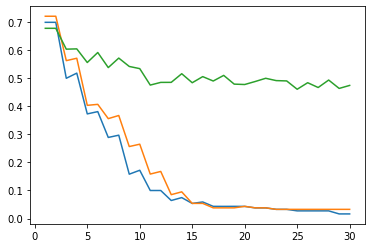

In [21]:
x = [i for i in range(1,31)]
y_euclidean = Fscore['Euclidean']
y_manhattan = Fscore['Manhattan']
y_cosine = Fscore['Cosine']
plt.plot(x,y_euclidean, label='Euclidean')
plt.plot(x,y_manhattan,label='Manhattan')
plt.plot(x,y_cosine,label='Cosine')
plt.show()

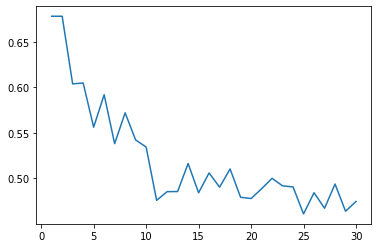

In [27]:
plt.plot(x,y_cosine,label='Cosine')
plt.show()

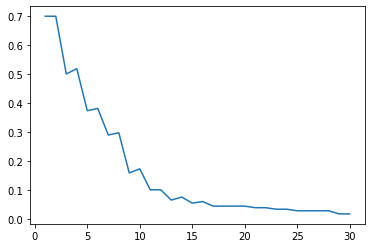

In [28]:
plt.plot(x,y_euclidean, label='Euclidean')
plt.show()

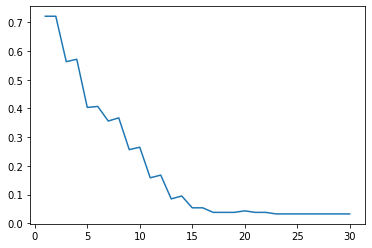

In [29]:
plt.plot(x,y_manhattan,label='Manhattan')
plt.show()

### Train and test Sklearn's KNN classifier model on your data (use metric which gave best results on your experimentation with built-from-scratch model.)

In [22]:
data_training = []
for i in range(len(data_train)):
  v = [0 for a in range(len(All_words))]
  for j in range(len(All_words)):
    if(All_words[j] in data_train[i]):
      v[j]=((train_tf[i][All_words[j]]*len(train_tf[i]))/len(All_words))
  data_training.append(v)
data_testing = []
for i in range(len(data_test)):
  v = [0 for a in range(len(All_words))]
  for j in range(len(All_words)):
    if(All_words[j] in data_test[i]):
      v[j]=((test_tf[i][All_words[j]]*len(test_tf[i]))/len(All_words))
  data_testing.append(v)

In [ ]:
#np.array(data_training[0]).shape

In [23]:
from sklearn.neighbors import KNeighborsClassifier
score = []
for k in range(1,31):
  fn = 0
  fp = 0
  tp = 0
  tn = 0
  neigh = KNeighborsClassifier(n_neighbors=k)
  neigh.fit(np.array(data_training), np.array(y_train))
  #score.append(neigh.score(np.array(data_testing), np.array(y_test)))
  tmp_test = neigh.predict(np.array(data_testing))
  for i in range(len(tmp_test)):
    if(tmp_test[i]==y_test[i]):
      if(tmp_test[0]=='h'):
        fn+=1
      else:
        tp+=1
    else:
      if(tmp_test[0]=='h'):
        fp+=1
      else:
        tn+=1
  pre = (tp/(tp+tn))
  re = (tp/(tp+fp))
  score.append((2*re*pre)/(re+pre))

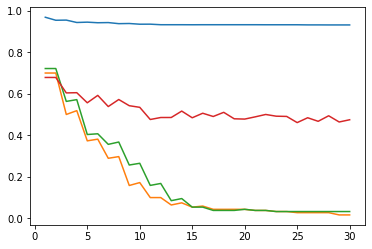

In [24]:
# plt.plot([i for i in range(1,31)], score,x, y_cosine, x, y_euclidean, x, y_manhattan)
x = [i for i in range(1,31)]
plt.plot(x, score, label='Score Sklearn KNN')
plt.plot(x,y_euclidean, label='Euclidean')
plt.plot(x,y_manhattan,label='Manhattan')
plt.plot(x,y_cosine,label='Cosine')
plt.show()

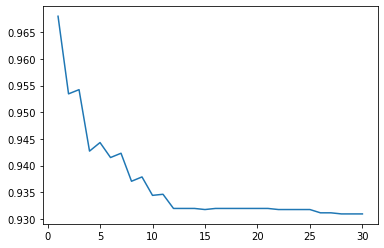

In [25]:
plt.plot(x, score, label='Score Sklearn KNN')
plt.show()

***Compare both the models result.***

*** What is the time complexity of training using KNN classifier? ***

***What is the time complexity while testing? Is KNN a linear classifier or can it learn any boundary?***